## 적층 LSTM 모델을 이용한 영화리뷰 분류 분석

In [8]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [9]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

### Step 1-2. 입력 데이터의 전처리 
* LSTM 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [10]:
from tensorflow.keras.preprocessing import sequence

In [11]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [12]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

### Step2. Bi-LSTM 모델 디자인

In [13]:
from tensorflow.keras import layers, models

In [14]:
# embedding layer: 32차원, hidden layer : Bi-LSTM 1개[32]
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32, input_length=800))
model.add(layers.Bidirectional(layers.LSTM(units=32)))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 800, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [16]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 46s 236ms/step - loss: 0.5104 - accuracy: 0.7591 - val_loss: 0.4813 - val_accuracy: 0.7942
Epoch 2/10
157/157 [==============================] - 34s 219ms/step - loss: 0.3015 - accuracy: 0.8813 - val_loss: 0.2969 - val_accuracy: 0.8862
Epoch 3/10
157/157 [==============================] - 34s 219ms/step - loss: 0.2369 - accuracy: 0.9107 - val_loss: 0.3583 - val_accuracy: 0.8780
Epoch 4/10
157/157 [==============================] - 34s 217ms/step - loss: 0.2033 - accuracy: 0.9242 - val_loss: 0.3173 - val_accuracy: 0.8628
Epoch 5/10
157/157 [==============================] - 34s 217ms/step - loss: 0.1786 - accuracy: 0.9344 - val_loss: 0.3454 - val_accuracy: 0.8646
Epoch 6/10
157/157 [==============================] - 34s 219ms/step - loss: 0.1641 - accuracy: 0.9427 - val_loss: 0.2991 - val_accuracy: 0.8892
Epoch 7/10
157/157 [==============================] - 34s 215ms/step - loss: 0.1442 - accuracy: 0.9511 - val_loss: 0.4826 - val_ac

In [18]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

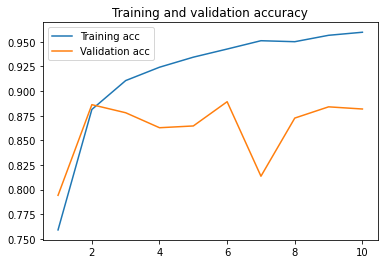

In [19]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

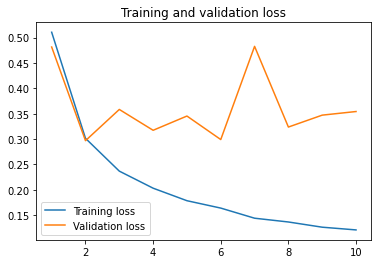

In [20]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 71s 91ms/step - loss: 0.4012 - accuracy: 0.8668
